In [1]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# The urge to group

Humans have an irrestible urge to categorize and group items. This is easily and frequently seen in the natural sciences with the usage of taxonomies or classes of models, but it extends the social sciences. 

Categorization and grouping in a business setting has a number of uses, i.e. who are *super-spreaders* that will efficiently spread advertising and word-of-mouth? Who are tastemakers? These questions are just as pertinent for the fields of innovation adoption and change management as they are for the business world. 

So far we have largely analyzed network attributes through through the aggregation of individual attributes. We have lacked a framework to ask and answer questions such as "Are there distinct groups within this network?"

This is an important question to ask and answer and has implications in both information spreading as well as understanding the relative strength of connections between nodes. Answering this question falls under what we term 'community detection' in network theory.

# Community detection

Community detection is what we term the family of methods to detect groups of individuals who are more connected to each other than to others in the network. The mathematical purpose of community detection is relatively simple, given a graph $G=(V,E)$ find some partition $p_i$ that maximizes in-group connectedness and minimizes out-group connectedness (partition is a synonym for community in the following). 

Sounds easy? Well actually this problem falls into a family of problems that we term `NP hard`. To illustrate this class of problems I will provide some numerical examples.

* A network with **2** nodes has **2** possible communities
* A network with **3** nodes has **5** possible communities
* A network with **10** nodes has **115975** possible communities
* A network with **100** nodes has **$10^{114}$** possible communities

As you can see, the number of possible community designations for a network explodes as $V$ grows (the calculation for the number of possible communities is simply the Bell Number). 

This generic class of problems suffers from two things. One, there exists no known analytical solution to identify the optimal partition for this class of problems. 

Second, It is computationally intractable to assess all of these possible partitions and their fitness (the number of possible partitions quickly exceeds the number of atoms in the universe). Which means that even if you wrote a computer program to evaluate every single partition for a sufficiently large network, the universe would likely cool and collapse first (to say nothing about your own mortality).

In order to solve this class of problems, we fall back to *heuristic* solutions. Given that all community detection algorithms are effectively heuristics, this means that there can be large number of possible solutions. This reality is reflected in the excessive number of publications on community detection algorithms during the 2000s. 

# Modularity

Modularity is one of the most well-known metrics that is used to identify a 'good' partition and describe the structure of the community. Modularity is calculated as:

$M\equiv\sum_{s=1}^{N_M}\frac{l_s}{L} - (\frac{d_s}{2L})^2$

where $L$ is the number of links, $l_s$ is the number of links between nodes in module $s$ (where a partition is defined as the ensemble of all modules), and $d_s$ is the sum of the degrees of the nodes in module $s$.

Why is there both the fraction of links out of total links and the fraction of degree divided by all degrees in the summation? Well, if we only had one portion of this equation, then any optimization would quickly provide a solution where all nodes are within one module. 

# Optimizing modularity

There are a number of optimization algorithms that can take the Modularity function and maximize it. Each optimization algorithm will have its own benefits and drawbacks (related to time of calculation and likelihood of finalizing in a local minima). 

We can use simulated annealing, which was detailed in Guimera and Amaral (2005) Functional cartography of complex metabolic networks. Nature 433, 895-900, and is distributed as a part of the [rgraph repository](https://github.com/seeslab/rgraph). Given the computationally intensive nature of community identification algorithms, any one worth using will almost certainly require compiling source code on any machine that you wish to run it on.  

In lieu of asking you all to compile this code on your own before class or doing so in class, I am providing the input and outputs ot the algorithm.

# Building intuition

Hopefully you are all Game of Thrones fans. Inside `data/got/` I have the Game of Thrones co-occurrence network as an edgelist (`got.edges`), a translation dictionary from node name to node id (`translation.json`), and the modules as found by netcarto (`got.mod`). In the module file, a module is on a line where there is not a `#` and all nodes in the module are listed(as their numeric node id, with a tab between node ids).

Read in the network and plot the network with the nodes colored by module id.

In [2]:
#Exercise


# Benefits of grouping

There are many benefits to creating groups of items. 

* An additional attribute becomes available to use when assessing differences between individuals
* Can further assess the strength of relationships between nodes that would not be as visible through edge strength alone
* Can visualize modules instead of individual nodes, easing the visual exploration of the system and its communication ([example](https://amaral.northwestern.edu/netexplore/))

We can easily do this with the GoT network, but its benefits will be limited since it is a small network. We will write the function though, since it will be of use later.

In [5]:
#Exercise


# Scaling up community analysis

Defining the number of communities (and the participants in each) begins to show its utility when the network grows in size. 

Here I will give you the network and modules for the amazon product graph (`../data/amazon/`). The network is created from crawling Amazon, where a link is created between a product and another product on its page (in the "customers also bought" div). We also have the ground truth communities based on the listed product category.

In [8]:
#Exercise


# Comparing the accuracy of sets

When we compare the accuracy of sets we generally use mutual information, which is a measure about the amount of shared 'information' between the two answers. Mutual information is given as

$I(X, Y) = H(X) + H(Y) - H(X,Y)$

In [10]:
# Exercise


# MapEquation and Infomap

Maximizing modularity is a time-consuming process as the network grows in size.

A method that was proposed later (and am highlighting because of its fundamental difference in concept), was Infomap. Infomap does not focus on Modularity (like many other proposed algorithms), but instead draws its algorithm from Information Theory. Infomap, more or less, treats travel between linked nodes as information and it attempts to compress that information for the entire network into the smallest informational structure possible (that is a rough description). 

We will dive directly into its module identifications of the Amazon product network (the infomap results can be found in `../data/amazon/infomap/`)

In [12]:
#Exercise


In [15]:
import math

def evaluate_overlap(community_a, community_b):
    overlap_count = 0 
    for node in community_a:
        if node in community_b:
            overlap_count += 1
    return overlap_count

def mutual_information(com_a, com_b):
    n = len([l for lset in com_a for l in lset])
    density = 0.
    overlap_number = 0 
    #Contribution due to partitioning a
    for community in com_a:
        n_i= float(len(community))
        density += n_i*math.log(n_i/n)
    #contribution due to partitioning b
    for community in com_b:
        n_j = float(len(community))
        density += n_j*math.log(n_j/n)
        #contributions from overlap
        for community_i in com_a:
            n_i= float(len(community_i))
            n_i_j = float(evaluate_overlap(community_i, community))
            if n_i_j > 0:
                overlap_number += n_i_j*math.log(n_i_j*n/n_i/n_j)
    overlap_number *= -2.0
    mutual_information = overlap_number/density   
    return mutual_information

mutual_information(am_infomod, am_gt)

6.7319634930772665

# Detailing accuracy of algorithms

Would these tests show that one algorithm is more 'accurate' than the other? In this context, yes - but generally no. 

There are a number of difficulties with determining the overall validity of an algorithm when using an observational dataset. The first one, is that there are likely to be issues with the supplied labelling. Think about Amazon - have you never seen a product where you questioned the supplied category? What about when you felt that it would fall into more than one category? Furthermore, these questions only detail one issue where we believe we have full information. However, we frequently do not have complete information - so the supplied categorizations have error (since they were generated by humans). 

# Synthetic benchmarks

One of the most important, basic additions to this area of research was the development of a synthetic benchmark generator in Lancichinetti, Fortunato, and Radicchi (2008, Benchmark graphs for testing community detection algorithms). 

This benchmark generator creates graphs that have heterogeneities in the degree of nodes and size of communities. It also has a variable parameter, $\mu$, that controls the amount of mixing for a node (i.e. links within communities vs. links between communities). 

The real advance is that the benchmark generates synthetic graphs that reproduce features of real data; however, the supplied labels are known to be correct (since they were generated and not assigned). The mixing parameter allows for the full range of algorithm performance to be assessed (to determine how performance degrades as the problem becomes more difficult).

Further, given a module designation in a real network - it would be possible to at least obtain a (biased) estimate of the amount of mixing to gain a sense of how much algorithm performance would degrade from optimal conditions for your real research problem.

# How best to think of synthetic benchmarks?

One of the easiest ways to think about creating these benchmarks (in my mind), borrows from a newer strain of network analysis. Believe it or not, this strain of research is largely based on re-discovering block models from Sociology.

In a stochastic block model we would view a network as an ordered adjacency matrix. The 'blocks' are the communities, so it is easy to see the amount of intermixing between modules.

To visualize this I will switch back to the game of thrones network

In [24]:
got_ordered_nodes = [int(l) for lset in module_listing for l in lset]
got_mat = nx.to_numpy_matrix(got, nodelist = [id2name[n] for n in got_ordered_nodes])

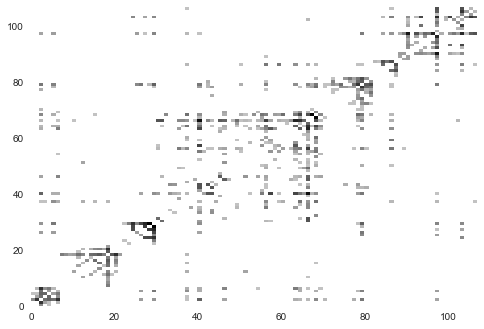

In [36]:
import numpy as np
#Add 1 to allow for the log application
got_mat += 1
#PLot the array
plt.pcolor( np.log(np.array(got_mat)) )

# Limits

The other important factor that it demonstrates is a **fundamental limit** on the resolution of any community detection algorithm. 

This limit comes when there is too much intermixing between communities for an algorithm to identify communities, but we know that these communities exist (due to the generation of the network). This limit is related to the amount of available signal in comparison to the noise and is not due to a deficiency in how the approach of community detection algorithms (i.e. no algorithm should ever be able to recover these communities).

# Other concerns and considerations

Should a node be in only one community? Is there a difference between communities that overlap and communities that are hierarchical? Should a community be such that it is stable over time? 

There are a number of differing opinions about what a community should mean. 